In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import keras
import tensorflow as tf


In [ ]:
bpl = pd.read_csv('/content/bpl_data.csv')
bpl.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,Sher-e-Bangla National Cricket Stadium,Dhaka Dynamites,Comilla Victorians,Soumya Sarkar,Mashrafe Mortaza,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,Sher-e-Bangla National Cricket Stadium,Dhaka Dynamites,Comilla Victorians,Tamim Iqbal,Mashrafe Mortaza,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,Sher-e-Bangla National Cricket Stadium,Dhaka Dynamites,Comilla Victorians,Anamul Haque,Taskin Ahmed,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,Sher-e-Bangla National Cricket Stadium,Dhaka Dynamites,Comilla Victorians,Mehidy Hasan,Taijul Islam,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,Sher-e-Bangla National Cricket Stadium,Dhaka Dynamites,Comilla Victorians,Shakib Al Hasan,Mashrafe Mortaza,2,0,0.4,2,0,0,0,222


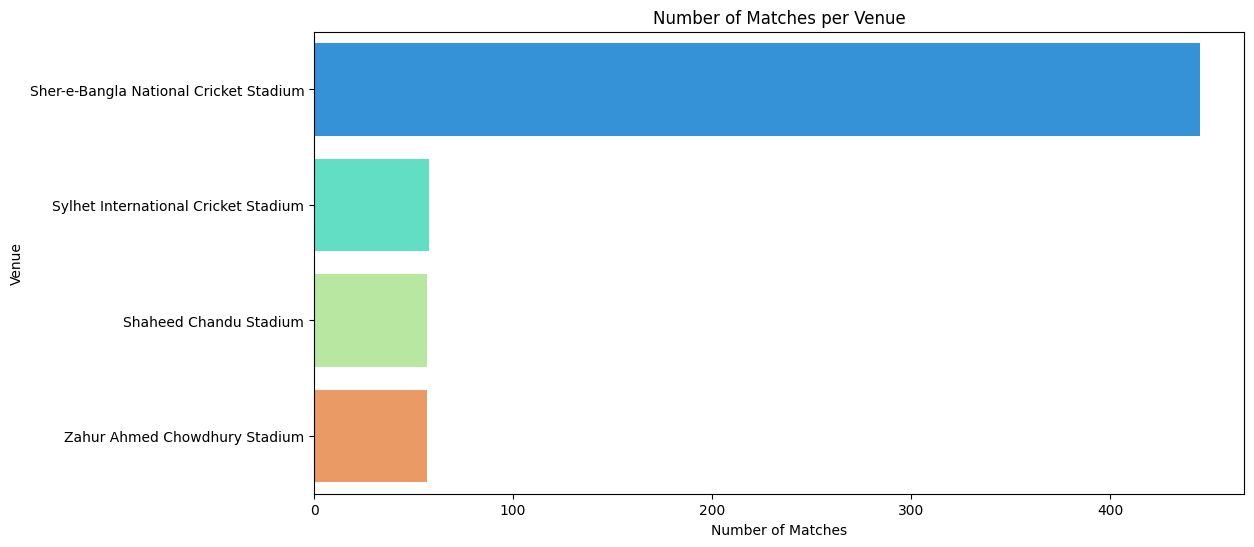

In [ ]:
data = bpl.copy()

# Matches per Venue
matches_per_venue = data[['mid', 'venue']].drop_duplicates()
matches_count = matches_per_venue['venue'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=matches_count.values, y=matches_count.index, palette="rainbow")
plt.title('Number of Matches per Venue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()


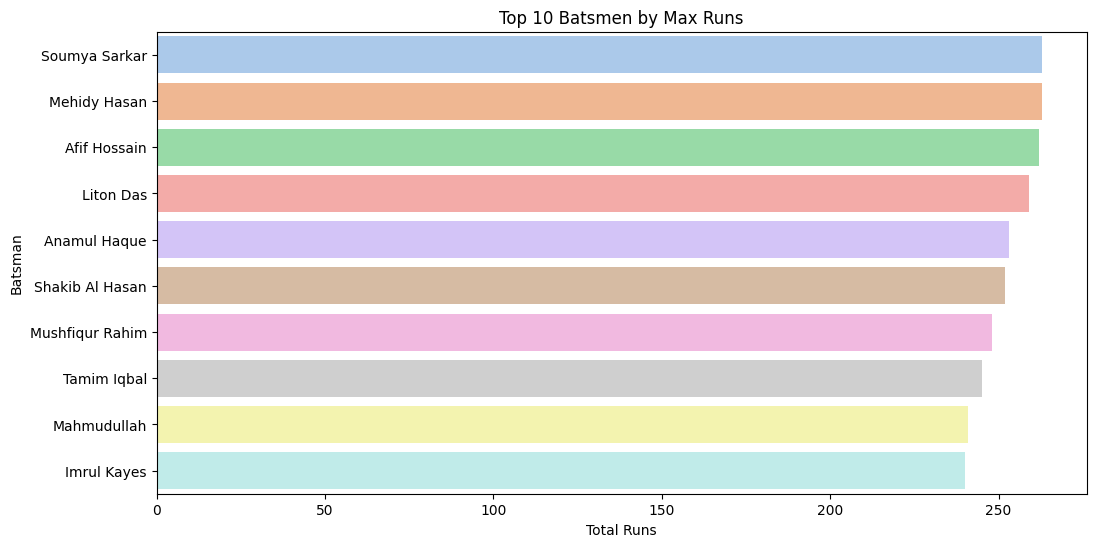

In [ ]:
runs_by_batsman = data.groupby('batsman')['runs'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=runs_by_batsman.values, y=runs_by_batsman.index, palette="pastel")
plt.title('Top 10 Batsmen by Max Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()


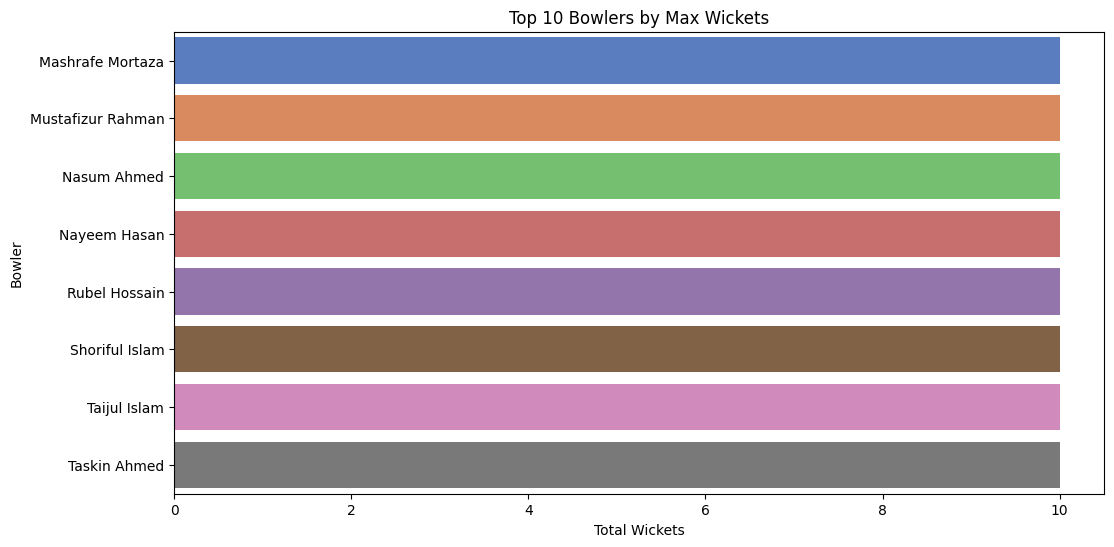

In [ ]:
wickets_by_bowler = data.groupby('bowler')['wickets'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=wickets_by_bowler.values, y=wickets_by_bowler.index, palette="muted")
plt.title('Top 10 Bowlers by Max Wickets')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()


In [ ]:
cat_cols = ['bat_team', 'bowl_team', 'venue', "batsman", "bowler"]
data_encoded = data.copy()
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le


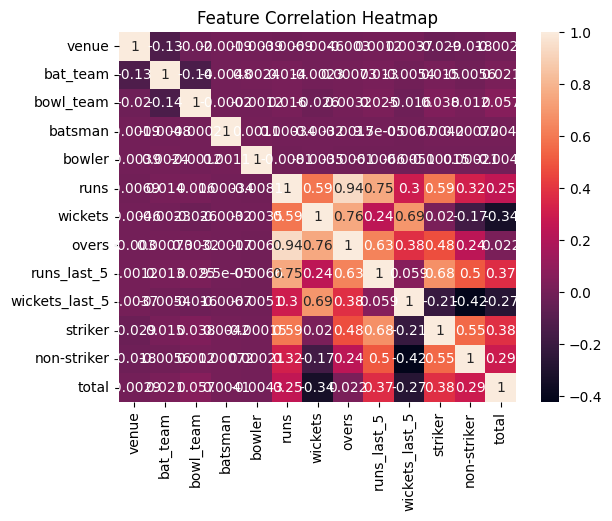

In [ ]:
data_corr = data_encoded.drop(columns=["date", "mid"], axis=1)
sns.heatmap(data_corr.corr(), annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# Drop highly correlated features
data_encoded.drop(columns=['runs_last_5', 'wickets_last_5', 'non-striker'], inplace=True)


In [ ]:
feature_cols = ['bat_team', 'bowl_team', 'venue', 'runs', 'wickets', 'overs', 'striker', 'batsman', 'bowler']

X = data_encoded[feature_cols]
y = data_encoded['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(216, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss)


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 53.2163 - val_loss: 15.0034
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 15.1610 - val_loss: 14.4800
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 14.6936 - val_loss: 14.5253
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 14.6132 - val_loss: 14.0853
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 14.3013 - val_loss: 14.0215
Epoch 6/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 14.3487 - val_loss: 13.9490
Epoch 7/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 14.3977 - val_loss: 13.8906
Epoch 8/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 14.3411 - val_loss: 13.9625
Epoch 9/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 14.3637 - val_loss: 13.8254
Epoch 10/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 14.1684 - val_loss: 14.4163


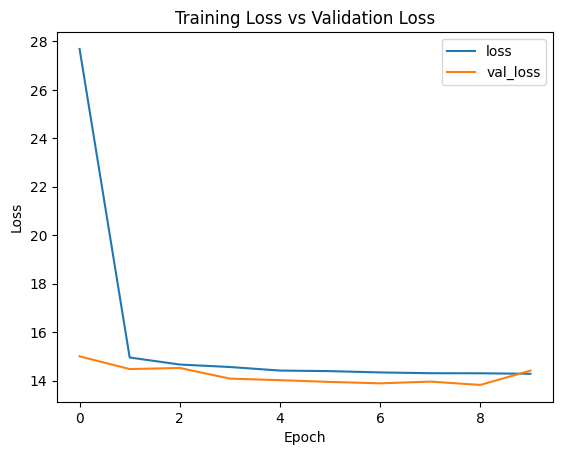

In [ ]:
pd.DataFrame(history.history).plot()
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
predictions = model.predict(X_test_scaled)
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Absolute Error: 14.908476829528809


In [24]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=list(label_encoders['venue'].classes_), description='Select Venue:')
batting_team = widgets.Dropdown(options=list(label_encoders['bat_team'].classes_), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=list(label_encoders['bowl_team'].classes_), description='Select Bowling Team:')
striker = widgets.Dropdown(options=list(label_encoders['batsman'].classes_), description='Select Striker:')
bowler = widgets.Dropdown(options=list(label_encoders['bowler'].classes_), description='Select Bowler:')
runs = widgets.IntText(value=0, description='Runs:')
wickets = widgets.IntText(value=0, description='Wickets:')
overs = widgets.FloatText(value=0.0, description='Overs:')
striker_ind = widgets.IntText(value=0, description='Striker Index:')
predict_button = widgets.Button(description="Predict Score")
output = widgets.Output()

def predict_score(b):
    with output:
        clear_output()
        input_features = [
            label_encoders['bat_team'].transform([batting_team.value])[0],
            label_encoders['bowl_team'].transform([bowling_team.value])[0],
            label_encoders['venue'].transform([venue.value])[0],
            runs.value,
            wickets.value,
            overs.value,
            striker_ind.value,
            label_encoders['batsman'].transform([striker.value])[0],
            label_encoders['bowler'].transform([bowler.value])[0]
        ]
        input_array = scaler.transform([input_features])
        predicted_score = model.predict(input_array)
        print(f"🏏 Predicted Total Runs: {int(predicted_score[0])}")

predict_button.on_click(predict_score)

display(venue, batting_team, bowling_team, striker, bowler, runs, wickets, overs, striker_ind, predict_button, output)


Dropdown(description='Select Venue:', options=('Shaheed Chandu Stadium', 'Sher-e-Bangla National Cricket Stadi…

Dropdown(description='Select Batting Team:', options=('Barisal Bulls', 'Chattogram Challengers', 'Comilla Vict…

Dropdown(description='Select Bowling Team:', options=('Barisal Bulls', 'Chattogram Challengers', 'Comilla Vict…

Dropdown(description='Select Striker:', options=('Afif Hossain', 'Anamul Haque', 'Imrul Kayes', 'Liton Das', '…

Dropdown(description='Select Bowler:', options=('Mashrafe Mortaza', 'Mustafizur Rahman', 'Nasum Ahmed', 'Nayee…

IntText(value=0, description='Runs:')

IntText(value=0, description='Wickets:')

FloatText(value=0.0, description='Overs:')

IntText(value=0, description='Striker Index:')

Button(description='Predict Score', style=ButtonStyle())

Output()